### Working notebook for EDA and generating data visualisations

In [1]:
# Change the backend to enable loading of emoji font
# import matplotlib, mplcairo
# print('Default backend: ' + matplotlib.get_backend()) 
# matplotlib.use("module://mplcairo.macosx")
# print('Backend is now ' + matplotlib.get_backend())


Default backend: module://ipykernel.pylab.backend_inline
Backend is now module://mplcairo.macosx


In [1]:
import os
import sys
sys.path.append('../sharechat-scraper')
import pymongo
from pymongo import MongoClient
from s3_mongo_helper import initialize_mongo
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import re
from collections import Counter
from dotenv import load_dotenv
load_dotenv()
%matplotlib inline

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import base64
import random
import plotly
import wordcloud
from wordcloud import WordCloud
from os import path
import nltk
from nltk.tokenize import regexp_tokenize

In [3]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [4]:
coll = initialize_mongo()

In [5]:
coll.count_documents({})

355303

In [6]:
diff = str(4)

In [7]:
int(diff) <=3

False

In [125]:
end = datetime.utcnow() 
start = end - timedelta(days=7)
cursor = coll.find({"scraped_date": {'$gte':start,'$lt':end}})

In [126]:
df = pd.DataFrame.from_records(cursor)

In [871]:
len(df)

32200

In [127]:
df.head(1)


,_id,bucket_id,bucket_name,caption,comments,comments_t+1,comments_t+2,comments_t+3,comments_t+34,comments_t+36,comments_t+37,comments_t+4,comments_t+5,external_shares,external_shares_t+1,external_shares_t+2,external_shares_t+3,external_shares_t+34,external_shares_t+36,external_shares_t+37,external_shares_t+4,external_shares_t+5,filename,language,likes,likes_t+1,likes_t+2,likes_t+3,likes_t+34,likes_t+36,likes_t+37,likes_t+4,likes_t+5,media_link,media_type,post_permalink,profile_page,reposts,reposts_t+1,reposts_t+2,reposts_t+3,reposts_t+34,reposts_t+36,reposts_t+37,reposts_t+4,reposts_t+5,s3_url,scraped_date,scraper_type,tag_category,tag_creation,tag_genre,tag_id,tag_members,tag_name,tag_rejects,tag_reports,tag_translation,text,thumbnail,timestamp,verified,views,views_t+1,views_t+2,views_t+3,views_t+34,views_t+36,views_t+37,views_t+4,views_t+5
0,5f443c7b93df35ae7b72f9c8,125,ख़बरें और राजनीति,#📰 समाचार एवं न्यूज़ पेपर क्लिप #Crime Against Men #👩‍🎨WhatsApp प्रोफाइल DP,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90f1dd5b-83ca-4169-a84e-5c8d6f8e907a,Hindi,1206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://cdn.sharechat.com/समाचारएवंन्यूज़पेपरक्लिप_3047261a_1598150606812_cmprsd_40.jpg,image,https://sharechat.com/post/q5KJbb7,https://sharechat.com/profile/78266438,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/90f1dd5b-83ca-4169-a84e-5c8d6f8e907a.jpg,2020-08-24 21:43:25.666,trending,Generic,1514808000,News,Kyweq,24009,📰 समाचार एवं न्यूज़ पेपर क्लिप,2723.0,55.0,📰 News and newspaper clip,None,https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/90f1dd5b-83ca-4169-a84e-5c8d6f8e907a.jpg,2020-08-23 02:43:27,0,93205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
df.columns

Index(['_id', 'bucket_id', 'bucket_name', 'caption', 'comments',
       'comments_t+1', 'comments_t+2', 'comments_t+3', 'comments_t+34',
       'comments_t+36', 'comments_t+37', 'comments_t+4', 'comments_t+5',
       'external_shares', 'external_shares_t+1', 'external_shares_t+2',
       'external_shares_t+3', 'external_shares_t+34', 'external_shares_t+36',
       'external_shares_t+37', 'external_shares_t+4', 'external_shares_t+5',
       'filename', 'language', 'likes', 'likes_t+1', 'likes_t+2', 'likes_t+3',
       'likes_t+34', 'likes_t+36', 'likes_t+37', 'likes_t+4', 'likes_t+5',
       'media_link', 'media_type', 'post_permalink', 'profile_page', 'reposts',
       'reposts_t+1', 'reposts_t+2', 'reposts_t+3', 'reposts_t+34',
       'reposts_t+36', 'reposts_t+37', 'reposts_t+4', 'reposts_t+5', 's3_url',
       'scraped_date', 'scraper_type', 'tag_category', 'tag_creation',
       'tag_genre', 'tag_id', 'tag_members', 'tag_name', 'tag_rejects',
       'tag_reports', 'tag_translation'

In [130]:
df.drop(["thumbnail", "_id", "filename",'views_t+34', 'views_t+36', 'views_t+37','reposts_t+34',
       'reposts_t+36', 'reposts_t+37','likes_t+34', 'likes_t+36', 'likes_t+37','external_shares_t+34', 'external_shares_t+36',
       'external_shares_t+37','comments_t+34',
       'comments_t+36', 'comments_t+37'], axis=1, inplace=True)

In [132]:
df[["comments", "likes", "reposts", "external_shares", "views", "verified"]] = df[["comments", "likes", "reposts", "external_shares", "views", "verified"]].apply(pd.to_numeric, errors='coerce')

## Verified vs non verified

In [133]:
df["verified"].value_counts()

0    30375
1    1797 
4    28   
Name: verified, dtype: int64

In [134]:
total = (df["verified"].value_counts()[0] + df["verified"].value_counts()[1])
verif = (df["verified"].value_counts()[1] / total) * 100
print(verif)

5.585602387168967


In [135]:
verif_df = df[df["verified"] != 4]

In [136]:
verif_df["verified"]=verif_df["verified"].astype("category")

/Users/kruttikanadig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



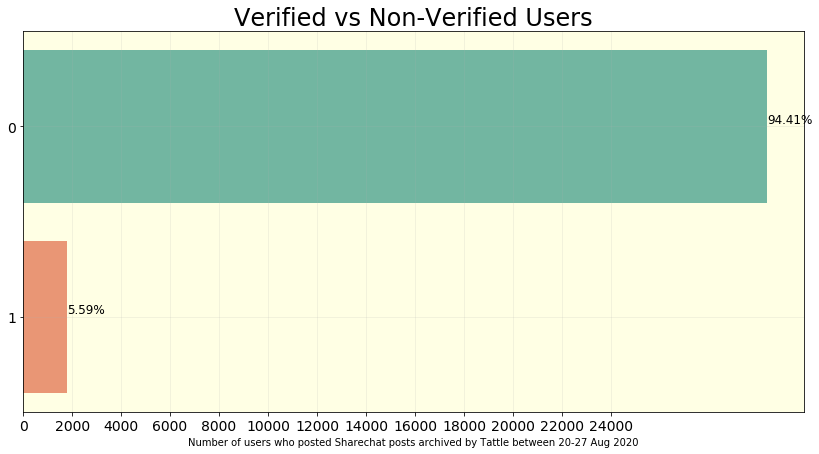

In [137]:
plt.figure(figsize=(14,7))
ax = sns.countplot(y = "verified", data = verif_df, order = verif_df["verified"].value_counts().index, palette = "Set2");
ax.set_alpha(0.8)
ax.set_title("Verified vs Non-Verified Users", fontsize=24)
ax.set_xlabel("Number of users who posted Sharechat posts archived by Tattle between 20-27 Aug 2020", fontsize=10);
ax.set_ylabel("");
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.set_xticks(range(0, 25000, 2000))
ax.set_facecolor('xkcd:off white')
ax.grid(alpha = 0.2)

# Add percentages to individual bars
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,
color='black')

plt.show()

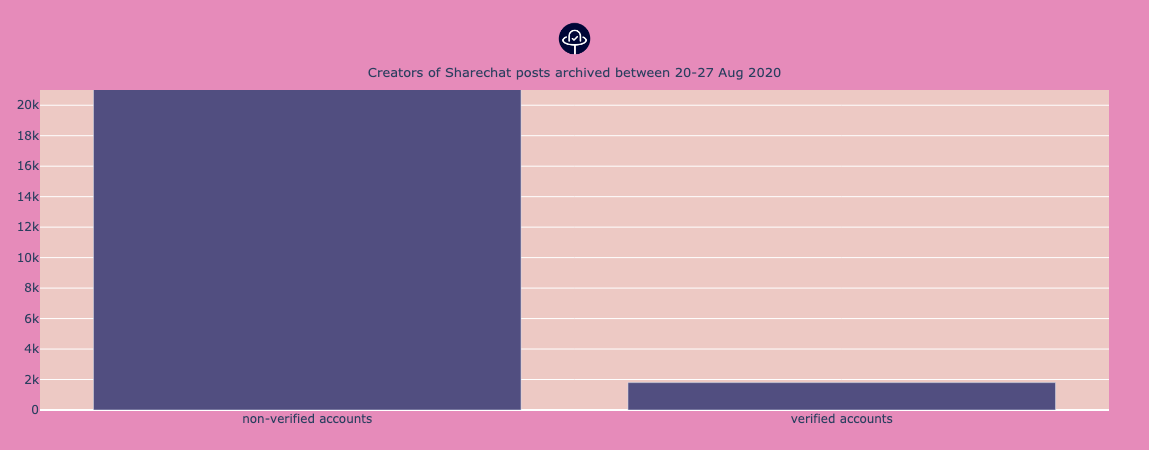

In [154]:
fig = go.Figure(
    data=[go.Bar(x=["non-verified accounts", "verified accounts"], 
                y=verif_df["verified"].value_counts())],
    layout=go.Layout(
        title=go.layout.Title(text="Creators of Sharechat posts archived between 20-27 Aug 2020",
                              x=0.5,
                              y=0.85,
                              yanchor="top",
                              font={"size":13}),
        plot_bgcolor="#EDC9C4",
        paper_bgcolor="#E68BBA",
       colorway=["#514E80"],
        width=500,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":90, "b":40}
    )
)
fig.update_yaxes(range=[0,21000], dtick=2000)
fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/favicon_tattle_monogram_dark.png",
                         xref="paper",
                         yref="paper",
                         x=0.5,
                         y=1.11,
                         sizex=0.1, 
                         sizey=0.1,
                         xanchor="center", 
                         yanchor="bottom"))

fig.show()

In [47]:
# from plotly.offline import plot
# plot(fig)

'temp-plot.html'

In [48]:
fig.write_image("sample.png", height=450,width=500,scale=10)

## Temporary tags

In [93]:
df["tag_category"].value_counts()

Temporary             6589
Niche                 6470
Generic               4508
Regional              1624
Community Campaign    1610
Special               803 
Tool Bug              203 
Name: tag_category, dtype: int64

In [357]:
df[df["tag_category"] == "Temporary"]["tag_translation"].value_counts()[:5]

corona prevention                         342
🏏Miss You dhoni😥                          302
tight investigation in Sushant's case👉    293
😢Corona : Pandemic not in control         282
✍important news📃                          266
Name: tag_translation, dtype: int64

## Most liked

In [113]:
most_liked = df.sort_values(by="likes", ascending=False)[:5]

In [114]:
most_liked["post_permalink"]

16051    https://sharechat.com/post/qJGgkaE 
8458     https://sharechat.com/post/qPkX3K3l
7988     https://sharechat.com/post/qXd6Bze 
8866     https://sharechat.com/post/qVPr9P7 
20802    https://sharechat.com/post/qBk4a4E 
Name: post_permalink, dtype: object

## Most shared

In [115]:
most_shared = df.sort_values(by="external_shares", ascending=False)[:5]

In [116]:
most_shared["post_permalink"]

20826    https://sharechat.com/post/qPzvR5aK
8458     https://sharechat.com/post/qPkX3K3l
4234     https://sharechat.com/post/qPNalxEl
16095    https://sharechat.com/post/qOVRkOx 
16051    https://sharechat.com/post/qJGgkaE 
Name: post_permalink, dtype: object

## Highest virality diff

In [119]:
df["likes_diff"] = df["likes_t+5"] - df["likes"]
df["shares_diff"] = df["external_shares_t+5"] - df["external_shares"]

In [126]:
df.sort_values(by="likes_diff", ascending=False)[:1]

,bucket_id,bucket_name,caption,comments,comments_t+1,comments_t+2,comments_t+3,comments_t+4,comments_t+5,external_shares,external_shares_t+1,external_shares_t+2,external_shares_t+3,external_shares_t+4,external_shares_t+5,language,likes,likes_t+1,likes_t+2,likes_t+3,likes_t+4,likes_t+5,media_link,media_type,post_permalink,profile_page,reposts,reposts_t+1,reposts_t+2,reposts_t+3,reposts_t+4,reposts_t+5,s3_url,scraped_date,scraper_type,tag_category,tag_creation,tag_genre,tag_id,tag_members,tag_name,tag_rejects,tag_reports,tag_translation,text,timestamp,verified,views,views_t+1,views_t+2,views_t+3,views_t+4,views_t+5,likes_diff,shares_diff
3139,515,समाचार,jay Rajasthan #🌁 राजस्थान के पर्यटन स्थल #🏘 म्हारो राजस्थान🙏 #👆 राजस्थान री धरोहर #🗞 राजस्थान समाचार,0,NaN,0.0,NaN,0.0,0.0,17,NaN,52.0,NaN,97.0,120.0,Rajasthani,30,NaN,191.0,NaN,330.0,399.0,https://cdn.sharechat.com/17b34d9c_1598047731114_c_v__a1f7ff5f-b6b0-40f7-8970-eac6c23a3137.mp4,video,https://sharechat.com/post/qkMNxDA,https://sharechat.com/profile/552377616,0,NaN,0.0,NaN,0.0,0.0,https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/45769f27-6449-4212-b4e7-f9b6e0ffde6b.mp4,2020-08-22 21:59:05.126,fresh,Generic,1521196007,News,B0q8R,5238,🗞 राजस्थान समाचार,66.0,43.0,Rajatshan News,None,2020-08-21 22:08:52,0,1051,NaN,6502.0,NaN,12471.0,15296.0,369.0,103.0


## Buckets

In [219]:
bucket_df['bucket_name'] = np.where(bucket_df['bucket_name'] == "देश प्रेमी", "देश प्रेम ", bucket_df['bucket_name'])

In [320]:
bucket_df["bucket_name"].unique()

array(['ख़बरें और राजनीति', 'कोरोना वायरस', 'स्वास्थ्य', 'देश प्रेम ',
       'समाचार', 'সাবধান : করোনা ভাইরাস', 'নিউস ', 'টাটকা Trend😎'],
      dtype=object)

In [321]:
bucket_df[bucket_df["bucket_name"]=="कोरोना वायरस"]["language"].unique()

array(['Hindi', 'Rajasthani', 'Telugu', 'Marathi'], dtype=object)

In [362]:
bucket_df["bucket_name"].value_counts().index

Index(['ख़बरें और राजनीति', 'देश प्रेम ', 'स्वास्थ्य', 'টাটকা Trend😎', 'নিউস ',
       'कोरोना वायरस', 'সাবধান : করোনা ভাইরাস', 'समाचार'],
      dtype='object')

In [643]:
buckets=['ख़बरें और राजनीति', 'देश प्रेम ', 'स्वास्थ्य', 'টাটকা Trend😎', 'নিউস ',
       'कोरोना वायरस', 'সাবধান : করোনা ভাইরাস', 'समाचार']

In [644]:
english_buckets= ["News & Politics", "Patriotism", "Health", "Fresh Trends", "News", "Coronavirus", "Caution: Coronavirus", "News"]

In [645]:
buckets_dict=dict(zip(buckets,english_buckets))

In [646]:
buckets_dict

{'ख़बरें और राजनीति': 'News & Politics',
 'देश प्रेम ': 'Patriotism',
 'स्वास्थ्य': 'Health',
 'টাটকা Trend😎': 'Fresh Trends',
 'নিউস ': 'News',
 'कोरोना वायरस': 'Coronavirus',
 'সাবধান : করোনা ভাইরাস': 'Caution: Coronavirus',
 'समाचार': 'News'}

In [885]:
xticks=[]
for k,v in buckets_dict.items():
    xticks.append(k+"<br>"+"("+v+")")

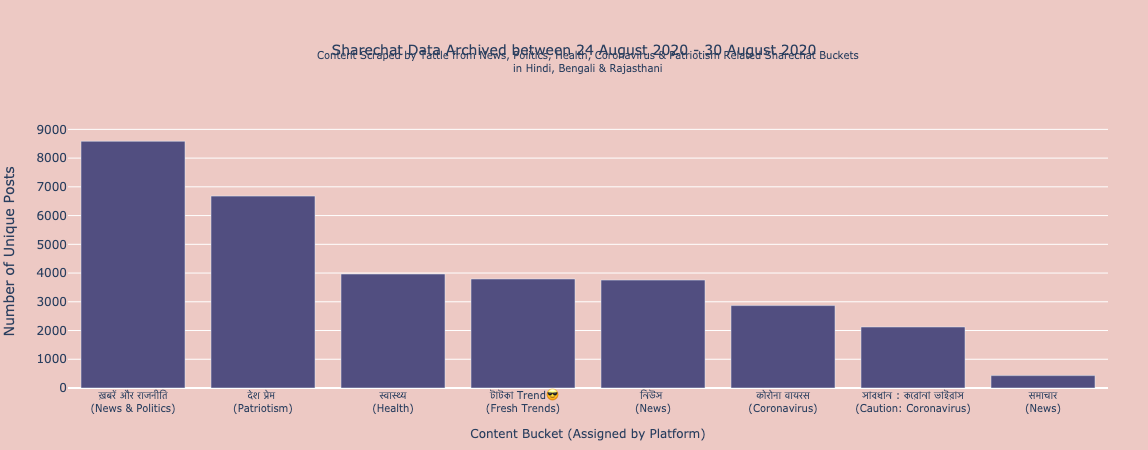

In [886]:
fig = go.Figure(
    data=[go.Bar(x=xticks,
        y=bucket_df["bucket_name"].value_counts())],
    layout=go.Layout(
        title=go.layout.Title(text="Sharechat Data Archived between 24 August 2020 - 30 August 2020",
                              x=0.5,
                              y=0.9,
                              yanchor="top",
                              font={"size":14}),
        plot_bgcolor="#EDC9C4",
       paper_bgcolor="#EDC9C4",
        colorway=["#514E80"],
        width=600,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":115, "b":40}
    )
)
fig.update_yaxes(range=[0,9500], dtick=1000)

fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/logo_name_blue.png",
                         xref="paper",
                         yref="paper",
                         x=-0.12,
                         y=-0.52,
                         sizex=0.11, 
                         sizey=0.11,
                         xanchor="left", 
                         yanchor="bottom"))
fig.update_layout(yaxis_title="Number of Unique Posts", xaxis_title={"text":"Content Bucket (Assigned by Platform)",
                                                             "font":{"size":12}})

fig.update_xaxes(tickfont=dict(size=10))

fig.update_layout(annotations=[
       go.layout.Annotation(
           xref="paper",
           yref="paper",
            showarrow=False,
            text="Content Scraped by Tattle from News, Politics, Health, Coronavirus & Patriotism Related Sharechat Buckets<br>"+"in Hindi, Bengali & Rajasthani",
            x=0.5,
            y=1.25,
            font=dict(
                size=10,
            )
        )])

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="tattle.co.in",
            showarrow=False,
            x=1.07,
            y=-0.52,
            font=dict(
                size=9,
            ))

fig.show()

In [887]:
fig.write_image("buckets31082020.png", width=600,height=450,scale=10)

## Popular

In [455]:
pop = df[df["external_shares"] > 500]

In [456]:
len(df)

32200

In [457]:
len(pop)

237

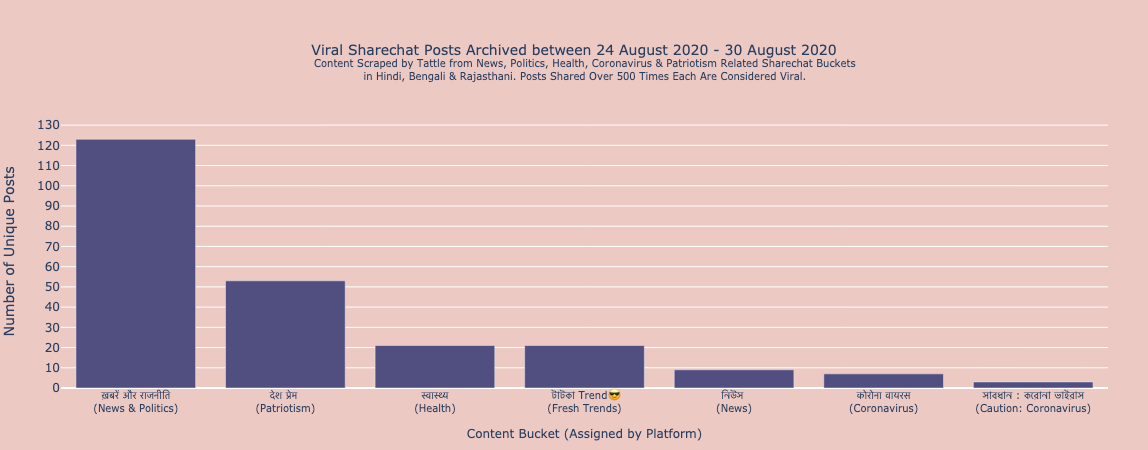

In [874]:
fig = go.Figure(
    data=[go.Bar(x=xticks,
        y=pop["bucket_name"].value_counts())],
    layout=go.Layout(
        title=go.layout.Title(text="Viral Sharechat Posts Archived between 24 August 2020 - 30 August 2020",
                              x=0.5,
                              y=0.9,
                              yanchor="top",
                              font={"size":14}),
        plot_bgcolor="#EDC9C4",
        paper_bgcolor="#EDC9C4",
        colorway=["#514E80"],
        width=600,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":115, "b":40}
    )
)
fig.update_yaxes(range=[0,135], dtick=10)

fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/logo_name_blue.png",
                         xref="paper",
                         yref="paper",
                         x=-0.12,
                         y=-0.52,
                         sizex=0.1, 
                         sizey=0.1,
                         xanchor="left", 
                         yanchor="bottom"))
fig.update_layout(yaxis_title="Number of Unique Posts", xaxis_title={"text":"Content Bucket (Assigned by Platform)",
                                                             "font":{"size":12}})

fig.update_xaxes(tickfont=dict(size=10))


fig.update_layout(annotations=[
       go.layout.Annotation(
           xref="paper",
           yref="paper",
            showarrow=False,
            text="Content Scraped by Tattle from News, Politics, Health, Coronavirus & Patriotism Related Sharechat Buckets<br>"+"in Hindi, Bengali & Rajasthani. Posts Shared Over 500 Times Each Are Considered Viral.",
            x=0.5,
            y=1.22,
            font=dict(
                size=10,
            )
        )])

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="tattle.co.in",
            showarrow=False,
            x=1.17,
            y=-0.52,
            font=dict(
                size=9,
            ))

fig.show()

In [875]:
fig.write_image("viralbuckets31082020.png", width=600,height=450,scale=10)

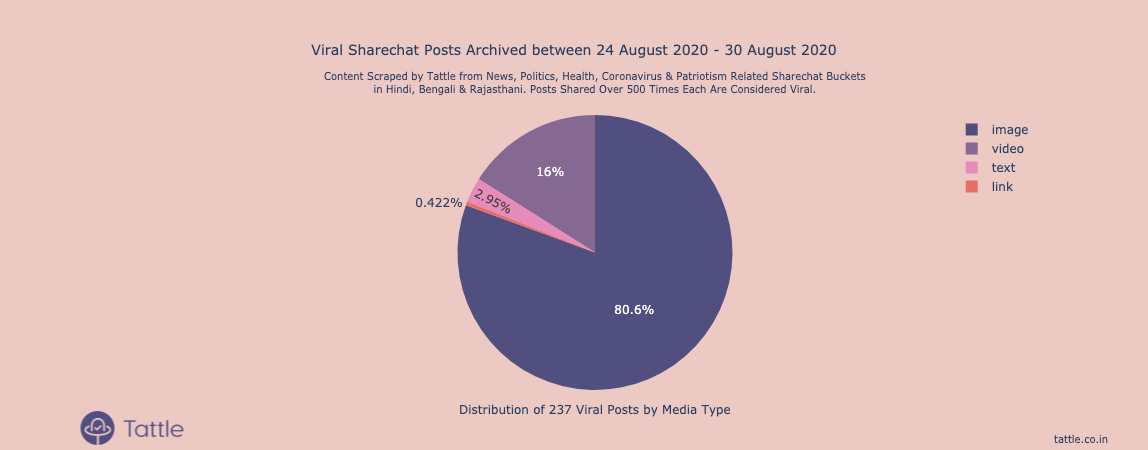

In [881]:
fig = go.Figure(
    data=[go.Pie(labels=pop["media_type"].value_counts().index, values=pop["media_type"].value_counts())],
        layout=go.Layout(
        title=go.layout.Title(text="Viral Sharechat Posts Archived between 24 August 2020 - 30 August 2020",
                              x=0.5,
                              y=0.9,
                              yanchor="top",
                              font={"size":14}),
        plot_bgcolor="#EDC9C4",
        paper_bgcolor="#EDC9C4",
        colorway=["#514E80", "#856993", "#E68BBA", "#E76D67"],
        width=600,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":115, "b":60}
    )
)
fig.update_yaxes(range=[0,205], dtick=10)

fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/logo_name_blue.png",
                         xref="paper",
                         yref="paper",
                         x=-0.25,
                         y=-0.2,
                         sizex=0.15, 
                         sizey=0.15,
                         xanchor="left", 
                         yanchor="bottom"))


fig.update_layout(annotations=[
       go.layout.Annotation(
           xref="paper",
           yref="paper",
            showarrow=False,
            text="Content Scraped by Tattle from News, Politics, Health, Coronavirus & Patriotism Related Sharechat Buckets<br>"+"in Hindi, Bengali & Rajasthani. Posts Shared Over 500 Times Each Are Considered Viral.",
            x=0.5,
            y=1.17,
            font=dict(
                size=10,
            )
        )])

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="tattle.co.in",
            showarrow=False,
            x=1.25,
            y=-0.21,
            font=dict(
                size=10,
            ))

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="Distribution of 237 Viral Posts by Media Type",
            showarrow=False,
            x=0.5,
            y=-0.1,
            font=dict(
                size=12,
            ))

fig.show()

In [880]:
len(pop)

237

In [882]:
fig.write_image("viralmediatypes31082020.png", width=600,height=450,scale=10)

In [614]:
tags=pop["tag_name"].value_counts().index[:10]

In [896]:
tags

Index(['🚨कोरोना ज़ोन अपडेट', '😳कोरोना: नहीं थम रहा क़हर',
       '🌎दुनिया में कोरोना का क़हर', '🧐कोरोना : सवालों के जवाब',
       '🙏कोरोना वायरस से बचाव', '📰 समाचार एवं न्यूज़ पेपर क्लिप',
       '👌 छत्तीसगढ़िया सबले बढ़िया', '🔐 ग्रुप: संघर्ष न्यूज ग्रुप',
       '🌐 राष्ट्रीय-अंतराष्ट्रीय खबरें', '📰आज का अख़बार'],
      dtype='object')

In [620]:
tags_all=dict(zip(pop["tag_name"],pop["tag_translation"]))

In [622]:
tags_dict = {}
for tag in tags:
    tags_dict[tag] = tags_all[tag]

In [623]:
tags_dict

{'🚨कोरोना ज़ोन अपडेट': '🚨Corona Zone Update',
 '😳कोरोना: नहीं थम रहा क़हर': '😢Corona : Pandemic not in control',
 '🌎दुनिया में कोरोना का क़हर': '🌎Coronavirus worldwide',
 '🧐कोरोना : सवालों के जवाब': '🧐Corona : Question-Answer',
 '🙏कोरोना वायरस से बचाव': '🙏Corona virus protection',
 '📰 समाचार एवं न्यूज़ पेपर क्लिप': '📰 News and newspaper clip',
 '👌 छत्तीसगढ़िया सबले बढ़िया': '👌 Chhattisgarhiya Are Best',
 '🔐 ग्रुप: संघर्ष न्यूज ग्रुप': '🔐 Group: Struggle News Group',
 '🌐 राष्ट्रीय-अंतराष्ट्रीय खबरें': '🌐 National-International News',
 '📰आज का अख़बार': "📰Today's Newspaper"}

In [888]:
xticks=[]
for k,v in tags_dict.items():
    xticks.append(k+"<br>"+"("+v+")")

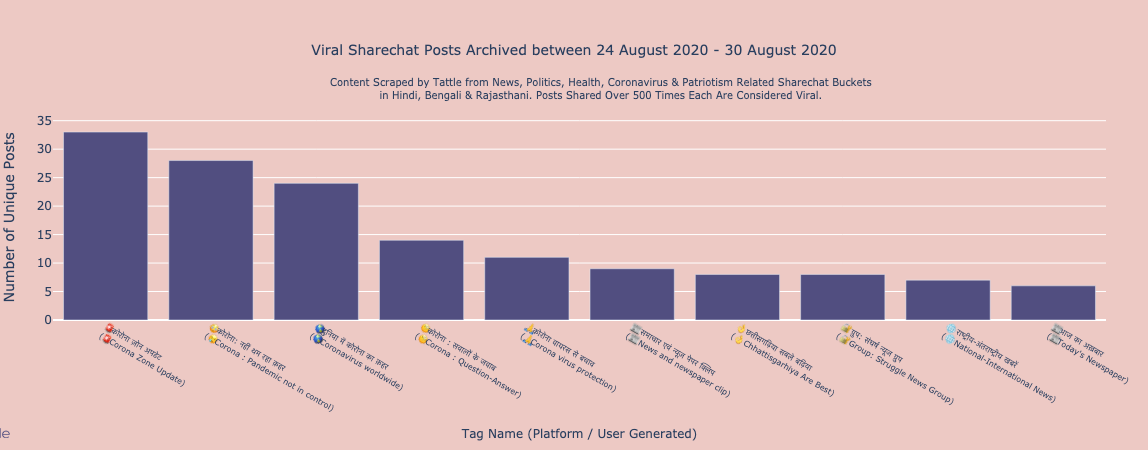

In [889]:
fig = go.Figure(
    data=[go.Bar(x=xticks,
        y=pop["tag_name"].value_counts()[:10])],
    layout=go.Layout(
        title=go.layout.Title(text="Viral Sharechat Posts Archived between 24 August 2020 - 30 August 2020",
                              x=0.5,
                              y=0.9,
                              yanchor="top",
                              font={"size":14}),
        plot_bgcolor="#EDC9C4",
        paper_bgcolor="#EDC9C4",
        colorway=["#514E80"],
        width=600,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":115, "b":40}
    )
)
fig.update_yaxes(range=[0,36], dtick=5)

fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/logo_name_blue.png",
                         xref="paper",
                         yref="paper",
                         x=-0.1,
                         y=-0.6,
                         sizex=0.1, 
                         sizey=0.1,
                         xanchor="left", 
                         yanchor="bottom"))
fig.update_layout(yaxis_title="Number of Unique Posts", xaxis_title={"text":"Tag Name (Platform / User Generated)",
                                                             "font":{"size":12}})

fig.update_xaxes(tickfont=dict(size=8))


fig.update_layout(annotations=[
       go.layout.Annotation(
           xref="paper",
           yref="paper",
            showarrow=False,
            text="Content Scraped by Tattle from News, Politics, Health, Coronavirus & Patriotism Related Sharechat Buckets<br>"+"in Hindi, Bengali & Rajasthani. Posts Shared Over 500 Times Each Are Considered Viral.",
            x=0.52,
            y=1.2,
            font=dict(
                size=10,
            )
        )])

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="tattle.co.in",
            showarrow=False,
            x=1.14,
            y=-0.62,
            font=dict(
                size=9,
            ))

fig.show()

In [890]:
fig.write_image("viraltags31082020.png", width=600,height=450,scale=10)

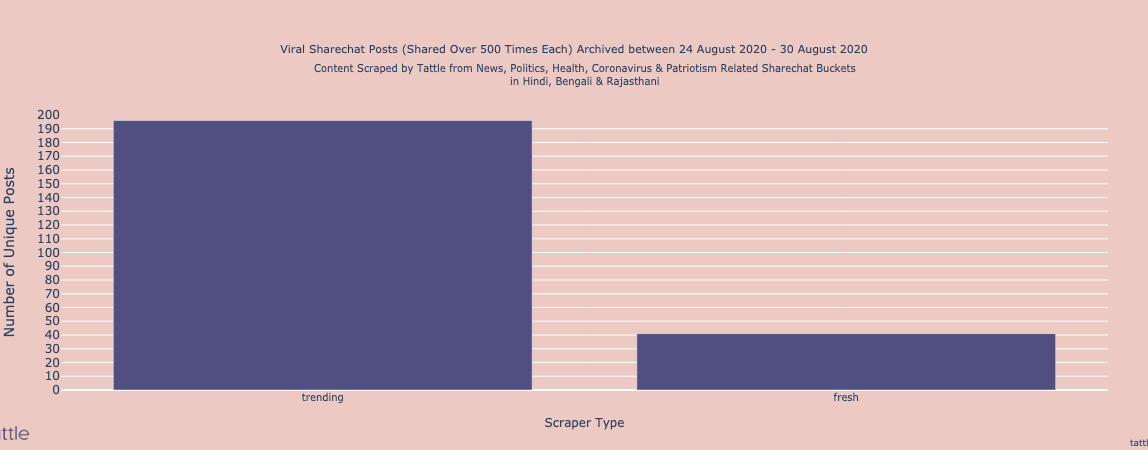

In [775]:
fig = go.Figure(
    data=[go.Bar(x=pop["scraper_type"].value_counts()[:10].index,
        y=pop["scraper_type"].value_counts()[:10])],
    layout=go.Layout(
        title=go.layout.Title(text="Viral Sharechat Posts (Shared Over 500 Times Each) Archived between 24 August 2020 - 30 August 2020",
                              x=0.5,
                              y=0.9,
                              yanchor="top",
                              font={"size":11}),
        plot_bgcolor="#EDC9C4",
        paper_bgcolor="#EDC9C4",
        colorway=["#514E80"],
        width=600,
        height=450,
        autosize=False,
        margin={"l":40, "r":40, "t":115, "b":60}
    )
)
fig.update_yaxes(range=[0,200], dtick=10)

fig.add_layout_image(dict(
                         source="https://raw.githubusercontent.com/tattle-made/sharechat-scraper/master/logo_name_blue.png",
                         xref="paper",
                         yref="paper",
                         x=-0.11,
                         y=-0.205,
                         sizex=0.1, 
                         sizey=0.1,
                         xanchor="left", 
                         yanchor="bottom"))
fig.update_layout(yaxis_title="Number of Unique Posts", xaxis_title={"text":"Scraper Type",
                                                             "font":{"size":12}})

fig.update_xaxes(tickfont=dict(size=10))


fig.update_layout(annotations=[
       go.layout.Annotation(
           xref="paper",
           yref="paper",
            showarrow=False,
            text="Content Scraped by Tattle from News, Politics, Health, Coronavirus & Patriotism Related Sharechat Buckets<br>"+"in Hindi, Bengali & Rajasthani",
            x=0.5,
            y=1.2,
            font=dict(
                size=10,
            )
        )])

fig.add_annotation(
           xref="paper",
           yref="paper",
            text="tattle.co.in",
            showarrow=False,
            x=1.07,
            y=-0.215,
            font=dict(
                size=9,
            ))

fig.show()

In [776]:
fig.write_image("viralscrapers31082020.png", width=600,height=450,scale=10)

In [526]:
fresh=pop[pop["scraper_type"] == "fresh"]
fresh["scraped_date"]-fresh["timestamp"]

2409    10:03:33.397000
2619    07:23:43.397000
2620    07:26:36.397000
5328    07:35:47.831000
5426    08:12:33.831000
9938    04:59:25.318000
9948    06:49:33.318000
9949    06:50:41.318000
10055   06:03:59.318000
10061   06:11:36.318000
10166   04:53:12.318000
10185   07:11:06.318000
10186   07:15:38.318000
11462   05:51:35.318000
11696   08:36:37.318000
14722   05:38:03.416000
14753   10:55:04.416000
14837   07:35:47.416000
14928   07:15:43.416000
16854   23:28:43.416000
18339   07:56:07.429000
18347   08:37:56.429000
18945   17:01:45.429000
19133   05:34:52.429000
19224   06:43:28.429000
19225   06:44:23.429000
19351   07:05:32.429000
19353   07:26:26.429000
24361   12:05:55.194000
25152   06:41:35.194000
25234   13:38:45.194000
25261   05:12:01.194000
25262   05:15:50.194000
25272   07:12:47.194000
25902   07:21:14.194000
29804   07:00:10.621000
29807   07:01:15.621000
29910   08:51:14.621000
30021   08:23:58.621000
30024   08:31:53.621000
30033   11:48:49.621000
dtype: timedelta

In [528]:
trending=pop[pop["scraper_type"] == "trending"]
trending["scraped_date"]-trending["timestamp"]

0       1 days 18:59:58.666000
1       5 days 19:43:52.666000
4       4 days 05:22:44.666000
14      6 days 15:12:16.666000
21      1 days 19:56:35.666000
78      1 days 20:35:05.666000
89      4 days 12:53:50.666000
151     1 days 18:26:03.666000
208     2 days 10:23:51.666000
210     1 days 18:34:05.666000
450     1 days 07:32:45.666000
469     0 days 20:59:04.666000
471     0 days 21:08:22.666000
490     1 days 20:20:33.666000
491     2 days 21:28:39.666000
492     4 days 09:06:21.666000
515     1 days 19:23:37.666000
546     2 days 20:52:01.666000
618     5 days 19:40:54.666000
796     5 days 18:47:38.666000
887     5 days 15:53:02.666000
899     5 days 09:38:59.666000
7697    1 days 16:12:16.793000
7740    0 days 22:46:32.793000
7767    2 days 12:00:30.793000
7886    1 days 17:36:39.793000
8068    0 days 22:02:42.793000
8081    2 days 08:53:58.793000
8084    5 days 01:18:00.793000
8105    3 days 16:08:11.793000
                 ...          
23155   0 days 19:10:59.262000
23158   

## Word clouds

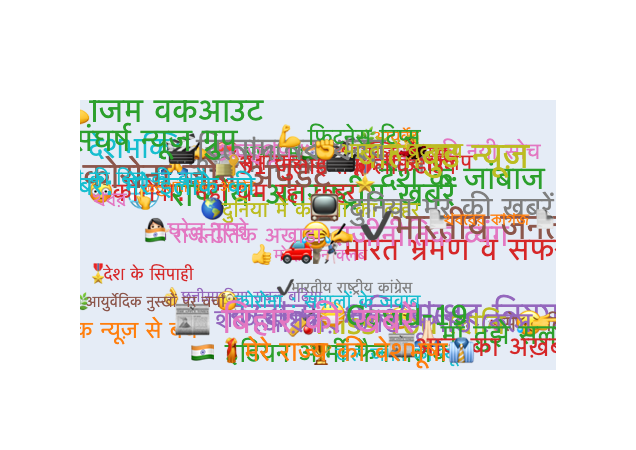

In [486]:
words = df["tag_name"].value_counts()[:50].index
#n = df["tag_name"].nunique()
n=50
colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[random.randrange(1, 10)] for i in range(n)]
#weights = df["tag_name"].value_counts()[:5]
weights = [random.randint(15, 35) for i in range(n)]
data = go.Scatter(x=[random.random() for i in range(n)],
                 y=[random.random() for i in range(n)],
                 mode='text',
                 text=words,
                 marker={'opacity': 0.3},
                 textfont={'size': weights,
                           'color': colors})
layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                    'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})
fig = go.Figure(data=[data], layout=layout)

fig.show()

In [477]:
fig.write_image("sample-tags.png",height=800,width=800,scale=10)

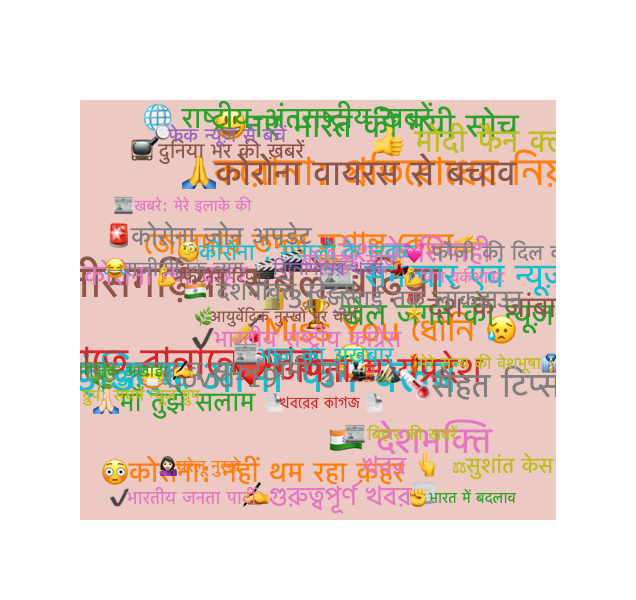

In [535]:
words = df["tag_name"].value_counts()[:50].index
frequency = df["tag_name"].value_counts()[:50]
lower, upper = 15, 45
frequency = [((x - min(frequency)) / (max(frequency) - min(frequency))) * (upper - lower) + lower for x in frequency]
length = len(words)
colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[random.randrange(1, 10)] for i in range(length)]

data = go.Scatter(
#x=list(range(length)),
x=random.choices(range(length), k=length),
y=random.choices(range(length), k=length),
mode='text',
text=words,
hovertext=['{0}{1}'.format(w, f) for w, f in zip(words, frequency)],
hoverinfo='text',
textfont={'size': frequency, 'color': colors})
layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                    'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}},
                  height=600,width=800,
                  plot_bgcolor="#EDC9C4")

fig = go.Figure(data=[data], layout=layout)
fig.show()

In [583]:
hindi_df = df[df["language"] == "Hindi"]
values = list(hindi_df["tag_name"].value_counts())
keys = list(hindi_df["tag_name"].value_counts().index)
freqs = dict(zip(keys,values))

In [549]:
font_path = path.join("/Users/kruttikanadig/Documents/Tattle/communications/Devanagari/Lohit-Devanagari.ttf",
                     "/Users/kruttikanadig/Documents/Tattle/communications/Assamese/Lohit-Bengali.ttf")

In [611]:
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF'|'\U0001F1EE,\U0001F1F3'|'\U0001F9D7'|'\U0001F9D0'|'\U0001F917'|'\U0001F9D8'|'\U0001F9B1'|'\U0001F913'|'\U0001F92B']"

In [612]:
#non_hindi = "^[\u0900-\u097F]"

In [588]:
keys= [re.sub(non_hindi,"", i)  for i in keys]

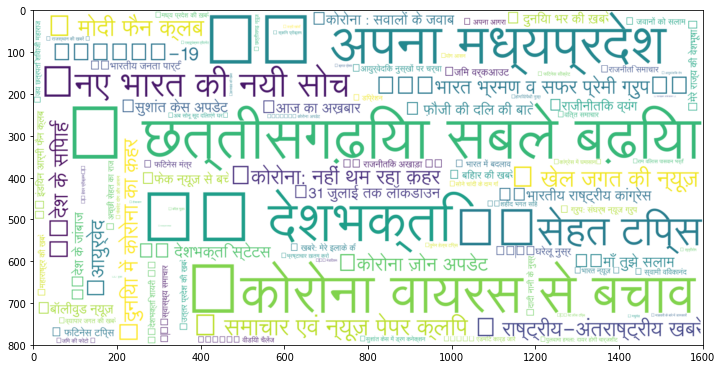

In [574]:
wordcloud = WordCloud(width=1600,height=800, font_path="/Users/kruttikanadig/Documents/Tattle/communications/Devanagari/Lohit-Devanagari.ttf", 
                      relative_scaling=0.5, background_color="white").generate_from_frequencies(freqs)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Emojis

In [646]:
def emoji_counter(data):
    text = " ".join(data)
    emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F1EE\U0001F1F3'|'\u2600-\u26FF\u2700-\u27BF'|'\U0001F1EE, \U0001F1F3'|'\U0001F9D7'|'\U0001F9D0'|'\U0001F917'|'\U0001F9D8'|'\U0001F9B1'|'\U0001F913'|'\U0001F92B']"
    # Find emojis
    emojis = regexp_tokenize(text, emoji)
    emoji_string = "".join(emojis)
    # Find emojis that contain two codepoints
    #char_with_modifier = re.compile(r'(.[\U0001f3fb-\U0001f3ff]?)')
    char_with_modifier = re.compile(r'(.[\U0001F1F3]?)')
    x = Counter(char_with_modifier.findall(emoji_string))
    return x.most_common()

In [647]:
emojis = emoji_counter(df["tag_name"].unique())
print(emojis)

[(' ', 670), ('📰', 16), ('🙏', 14), ('🏻', 9), ('🇮🇳', 8), ('👉', 8), ('🎂', 6), ('😷', 5), ('😥', 5), ('🗞', 4), ('🧘', 4), ('💪', 4), ('🤗', 4), ('📱', 4), ('📺', 3), ('🔐', 3), ('🎬', 3), ('✍', 3), ('👩', 3), ('⚕', 3), ('🌿', 3), ('😔', 3), ('♂', 3), ('🏏', 3), ('💐', 3), ('✔', 2), ('😳', 2), ('🧐', 2), ('🌡', 2), ('🦱', 2), ('👨', 2), ('💉', 2), ('😑', 2), ('😃', 2), ('🎖', 2), ('🙅', 2), ('😎', 2), ('❤', 2), ('😲', 2), ('👆', 2), ('⚽', 2), ('📃', 2), ('☪', 2), ('📄', 2), ('📈', 2), ('✋', 2), ('💴', 2), ('👤', 2), ('👀', 2), ('❌', 2), ("'", 2), ('👍', 1), ('🏆', 1), ('🌐', 1), ('😂', 1), ('🔎', 1), ('📝', 1), ('💰', 1), ('⚖', 1), ('🌎', 1), ('💁', 1), ('♀', 1), ('🙂', 1), ('🤓', 1), ('📸', 1), ('🤫', 1), ('🔖', 1), ('🌼', 1), ('🖊', 1), ('💓', 1), ('👌', 1), ('✊', 1), ('🧗', 1), ('⛰', 1), ('👔', 1), ('📞', 1), ('😱', 1), ('😀', 1), ('🗣', 1), ('⛽', 1), ('😊', 1), ('😵', 1), ('📢', 1), ('☺', 1), ('💃', 1), ('😠', 1), ('🙋', 1), ('🙄', 1), ('❓', 1), ('❗', 1), ('🕺', 1), ('🎥', 1), ('🌟', 1), ('😨', 1), ('😟', 1), ('⛈', 1), ('🐶', 1), ('🐕', 1), ('📩', 1), ('🍌'

In [648]:
emoji_dict = dict(emojis)
key = emoji_dict.keys()
emoji_df = pd.DataFrame(emojis,index=key)

In [672]:
# Clean up the emojis dataframe
emoji_df.reset_index(inplace = True, drop = True)
# Merge identical emojis
#emoji_df[1][1] = (emoji_df[1][1] + emoji_df[1][9])
# Drop non-emoji characters
emoji_df.drop(index = [0,3], inplace = True)
emoji_df.reset_index(drop = True, inplace = True)
# Separate the top 10 emojis 
emoji_df_20 = emoji_df[:10]

In [673]:
# Save emojis and their frequencies for plotting
em = emoji_df_20[0]
freq = emoji_df_20[1]

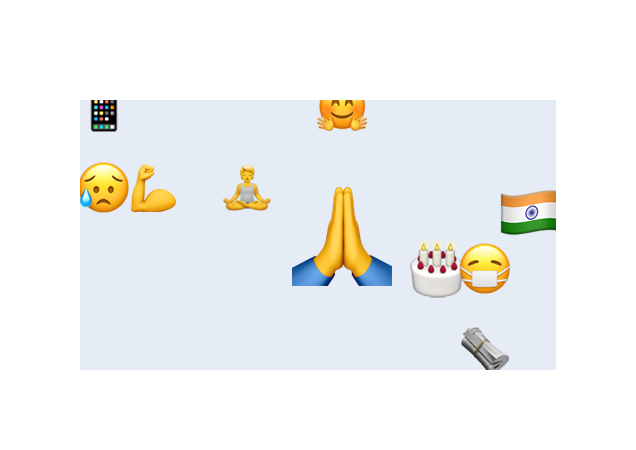

In [684]:
words = em
frequency = freq
lower, upper = 50, 100
frequency = [((x - min(frequency)) / (max(frequency) - min(frequency))) * (upper - lower) + lower for x in frequency]
length = len(words)
colors = [plotly.colors.DEFAULT_PLOTLY_COLORS[random.randrange(1, 10)] for i in range(length)]

data = go.Scatter(
x=random.choices(range(length), k=length),
y=random.choices(range(length), k=length),
mode='text',
text=words,
hovertext=['{0}{1}'.format(w, f) for w, f in zip(words, freq)],
hoverinfo='text',
textfont={'size': frequency, 'color': colors})
layout = go.Layout({'xaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False},
                    'yaxis': {'showgrid': False, 'showticklabels': False, 'zeroline': False}})

fig = go.Figure(data=[data], layout=layout)
fig.show()

## Viral posts

In [117]:
# Convert virality metric fields to numeric & filter
def get_viral(coll):
    pipeline = [
        {"$project":{"post_permalink": "$post_permalink", "s3_url":"$s3_url", "language":"$language",
                     "tag_name":"$tag_name","tag_translation": "$tag_translation", "tag_genre":"$tag_genre", "bucket_name": "$bucket_name",
                     "bucket_id": "$bucket_id", 
                    "scraped_date": {"$dateToString": {"date": "$scraped_date"}},
                     "shares": {"$toInt": "$external_shares"}}},
        {"$match": {"shares": {"$gte": 50000}}}
    ]
    
    docs = coll.aggregate(pipeline)
    for i in docs:
        print(i)
    return docs

In [118]:
viral = get_viral(coll)

{'_id': ObjectId('5f2b2e26bda705c8139c09ca'), 'post_permalink': 'https://sharechat.com/post/8r1Nrd8w', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/d8018a4a-bd81-45e9-a81c-21ecc1cd453a.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 85190}
{'_id': ObjectId('5f2b2e26bda705c8139c09cd'), 'post_permalink': 'https://sharechat.com/post/8lRmnkZ', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/a5db9609-11c4-435b-9ca9-a641ca8f3fd9.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 112074}
{'_id': ObjectId('5f2b2e26bda705c8139c09ce'), 'post_permalink': 'https://sharechat.c

In [120]:
viral = [{'post_permalink': 'https://sharechat.com/post/8r1Nrd8w', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/d8018a4a-bd81-45e9-a81c-21ecc1cd453a.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 85190},
{'post_permalink': 'https://sharechat.com/post/8lRmnkZ', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/a5db9609-11c4-435b-9ca9-a641ca8f3fd9.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 112074},
{'post_permalink': 'https://sharechat.com/post/8M8rpZO', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/6a00c401-bced-4524-ae0c-a26f583ec235.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 61924},
{'post_permalink': 'https://sharechat.com/post/8KwpxKZ', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/0ebb4e5a-74da-4e78-b992-1afb1e279fcb.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 55775},
{'post_permalink': 'https://sharechat.com/post/8rGKWJPw', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/8d1b2d1e-08e2-4624-a421-b38eda4228ab.mp4', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 57992},
{'post_permalink': 'https://sharechat.com/post/8zDDVzZ', 's3_url': 'https://s3.ap-south-1.amazonaws.com/sharechat-scraper.tattle.co.in/a60e483d-06d2-4f31-bfad-2c60a02e2c7d.jpg', 'language': 'Hindi', 'tag_name': '🏛राम मंदिर भूमिपूजन🚩', 'tag_translation': '🏛Ram Mandir Event🚩', 'tag_genre': 'News', 'bucket_name': 'ख़बरें और राजनीति', 'bucket_id': 125, 'scraped_date': '2020-08-05T21:14:55.954Z', 'shares': 59973}]

In [123]:
viral = pd.DataFrame(viral)

In [124]:
viral.to_csv("most_viral.csv",index=False)